<a href="https://colab.research.google.com/github/Abhinav1717/Cat-Dog-Classification/blob/master/Cat_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting Up Gpu with Tensorflow

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.6555551639999067
GPU (s):
0.19175546399992527
GPU speedup over CPU: 19x


# Setting Up the Data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline 

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:

! kaggle datasets download -d biaiscience/dogs-vs-cats



 99% 807M/817M [00:06<00:00, 141MB/s]
100% 817M/817M [00:06<00:00, 139MB/s]


In [ ]:
! mkdir data

In [ ]:
!unzip dogs-vs-cats.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/train/train/dog.55.jpg  
  inflating: data/train/train/dog.550.jpg  
  inflating: data/train/train/dog.5500.jpg  
  inflating: data/train/train/dog.5501.jpg  
  inflating: data/train/train/dog.5502.jpg  
  inflating: data/train/train/dog.5503.jpg  
  inflating: data/train/train/dog.5504.jpg  
  inflating: data/train/train/dog.5505.jpg  
  inflating: data/train/train/dog.5506.jpg  
  inflating: data/train/train/dog.5507.jpg  
  inflating: data/train/train/dog.5508.jpg  
  inflating: data/train/train/dog.5509.jpg  
  inflating: data/train/train/dog.551.jpg  
  inflating: data/train/train/dog.5510.jpg  
  inflating: data/train/train/dog.5511.jpg  
  inflating: data/train/train/dog.5512.jpg  
  inflating: data/train/train/dog.5513.jpg  
  inflating: data/train/train/dog.5514.jpg  
  inflating: data/train/train/dog.5515.jpg  
  inflating: data/train/train/dog.5516.jpg  
  inflating: data/train/train/dog.5517.jpg  
  inflat

In [ ]:
train_dir = '/content/data/train/train'

In [ ]:
import glob
import shutil

In [ ]:
count=0
for f in glob.glob(os.path.join(train_dir,'*.jpg')):
  if count ==1:
    break
  print(f.split('/')[-1].split('.')[0])
  count+=1

cat


In [ ]:
dog_count = 0
cat_count = 0
os.mkdir('/content/data/train/cat')
os.mkdir('/content/data/train/dog')
cat_dir = '/content/data/train/cat'
dog_dir = '/content/data/train/dog'
for f in glob.glob(os.path.join(train_dir,'*.jpg')):
  if f.split('/')[-1].split('.')[0]=='dog' and dog_count<1201:
    shutil.move(f,dog_dir)
    dog_count+=1
  elif f.split('/')[-1].split('.')[0]=='cat' and cat_count<1201:
    shutil.move(f,cat_dir)
    cat_count+=1


In [ ]:
shutil.rmtree(train_dir)

In [ ]:
os.mkdir('/content/data/check')
os.mkdir('/content/data/check/dog')
os.mkdir('/content/data/check/cat')
cat_dir = '/content/data/check/cat'
dog_dir = '/content/data/check/dog'

In [ ]:
src = os.path.join('/content/data/train/dog','*.jpg')
count=0
for f in glob.glob(src):
  if count ==100:
    break
  shutil.move(f,dog_dir)
  count+=1

In [ ]:
src = os.path.join('/content/data/train/cat','*.jpg')
count=0
for f in glob.glob(src):
  if count ==100:
    break
  shutil.move(f,cat_dir)
  count+=1

In [ ]:
os.mkdir('/content/data/validation')
os.mkdir('/content/data/validation/dog')
os.mkdir('/content/data/validation/cat')
cat_dir = '/content/data/validation/cat'
dog_dir = '/content/data/validation/dog'

In [ ]:
src = os.path.join('/content/data/train/dog','*.jpg')
count=0
for f in glob.glob(src):
  if count ==100:
    break
  shutil.move(f,dog_dir)
  count+=1

In [ ]:
src = os.path.join('/content/data/train/cat','*.jpg')
count=0
for f in glob.glob(src):
  if count ==100:
    break
  shutil.move(f,cat_dir)
  count+=1

In [ ]:
train_data= tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)


In [ ]:
train_dir = '/content/data/train'
validation_dir = '/content/data/validation'

In [ ]:
train_gen = train_data.flow_from_directory(train_dir,batch_size=10,target_size=(224,224))

Found 2002 images belonging to 2 classes.


In [ ]:
val_gen = train_data.flow_from_directory(validation_dir,batch_size=10,target_size=(224,224))

Found 200 images belonging to 2 classes.


# Using a pre-trained VGG-16 for transfer learning

In [ ]:
model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
mymodel = tf.keras.models.Sequential()

In [ ]:
for layer in model.layers[:-1]:
  mymodel.add(layer)
  layer.trainable=False

In [ ]:

mymodel.add(tf.keras.layers.Dense(2,activation='softmax'))

In [ ]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
mymodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = mymodel.fit(x=train_gen,epochs = 10,verbose =1,validation_data=val_gen)

Epoch 1/10
201/201 [==============================] - 33s 166ms/step - loss: 0.1283 - accuracy: 0.9620 - val_loss: 0.1980 - val_accuracy: 0.9700
Epoch 2/10
201/201 [==============================] - 32s 158ms/step - loss: 0.0359 - accuracy: 0.9880 - val_loss: 0.1132 - val_accuracy: 0.9800
Epoch 3/10
201/201 [==============================] - 32s 159ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.1736 - val_accuracy: 0.9650
Epoch 4/10
201/201 [==============================] - 32s 159ms/step - loss: 0.0070 - accuracy: 0.9970 - val_loss: 0.1362 - val_accuracy: 0.9700
Epoch 5/10
201/201 [==============================] - 32s 159ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 0.1488 - val_accuracy: 0.9700
Epoch 6/10
201/201 [==============================] - 32s 157ms/step - loss: 3.8667e-04 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.9700
Epoch 7/10
201/201 [==============================] - 32s 158ms/step - loss: 1.9375e-04 - accuracy: 1.0000 - val_loss: 0.1489 

In [ ]:
import matplotlib.pyplot as plt

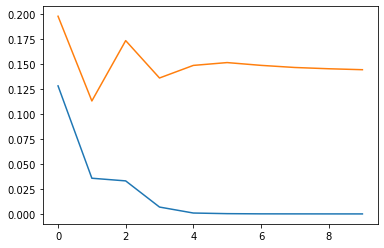

In [ ]:
plt.plot(mymodel.history.history['loss'])
plt.plot(mymodel.history.history['val_loss'])

In [ ]:
test_gen  = train_data.flow_from_directory('/content/data/check',target_size=(224,224))

Found 200 images belonging to 2 classes.


In [ ]:
mymodel.evaluate(test_gen)

7/7 [==============================] - 3s 400ms/step - loss: 0.0466 - accuracy: 0.9800


[0.04657687619328499, 0.9800000190734863]

# Predictions

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def plotimage(path,label):
  img = cv2.imread(path)
  plt.imshow(img[:,:,[2,1,0]])
  plt.xticks([])
  plt.yticks([])
  plt.title(label)
  plt.show()

In [ ]:
def mypredict(path):
  img = cv2.imread(path)
  img = tf.keras.applications.vgg16.preprocess_input(img)
  img = cv2.resize(img,(224,224))
  pred = mymodel.predict(np.expand_dims(img,axis=0))
  if(pred[0][0]>pred[0][1]):
     label = 'cat'
  else:
     label = 'dog'
  plotimage(path,label)


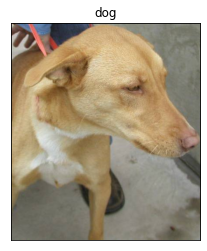

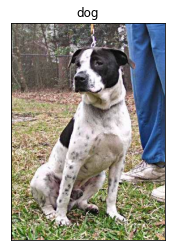

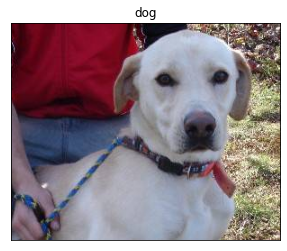

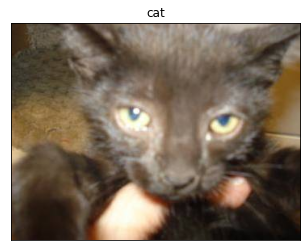

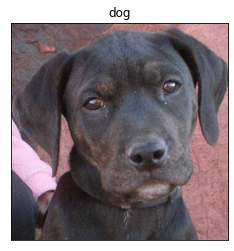

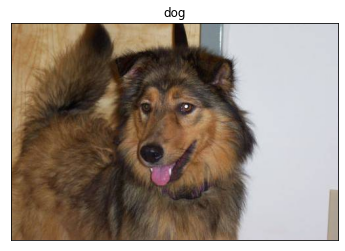

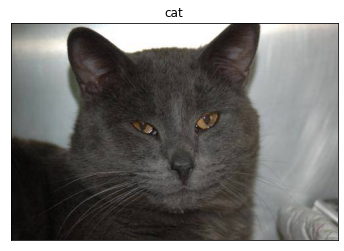

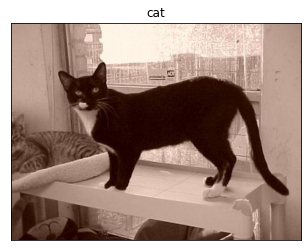

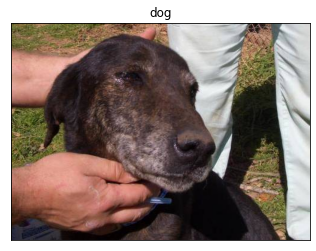

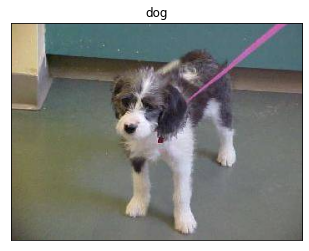

In [ ]:
count= 0
test_dir = '/content/data/test/test'
for f in glob.glob(os.path.join(test_dir,'*.jpg')):
  if count==10:
    break
  mypredict(f)
  count+=1
  

In [ ]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

# Visualising the Activations of Intermediate Layers

In [ ]:
layer_outputs = [layer.output for layer in mymodel.layers[:10]] 
# Extracts the outputs of the top 12 layers
activation_model = tf.keras.models.Model(inputs=mymodel.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [ ]:
img = cv2.imread('/content/Chinook-On-White-03.jpg')
img = tf.keras.applications.vgg16.preprocess_input(img)
img = cv2.resize(img,(224,224))
activations = activation_model.predict(np.expand_dims(img,axis=0))

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 224, 224, 64)


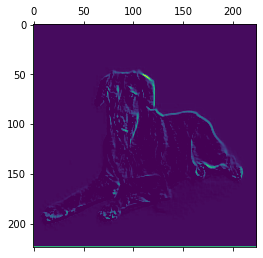

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [ ]:
layer_names = []
for layer in mymodel.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
​
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')